# Learning OpenCV 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Adding Trackbar

In [10]:
cap = cv2.VideoCapture('selfievideo.mp4') # getting video

def on_trackbar(val): # trackbar function
    cap.set(cv2.CAP_PROP_POS_FRAMES, val)

cv2.namedWindow('Video') 

# Trackbar name, Window name, Default slider value, Maximum value, Callback function
cv2.createTrackbar('Position', 'Video', 0, int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), on_trackbar)

while cap.isOpened():
    ret, frame = cap.read()
    
    frame = cv2.resize(frame, (640, 480))
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Smoothning an Image to Reduce Noise and Sharpness

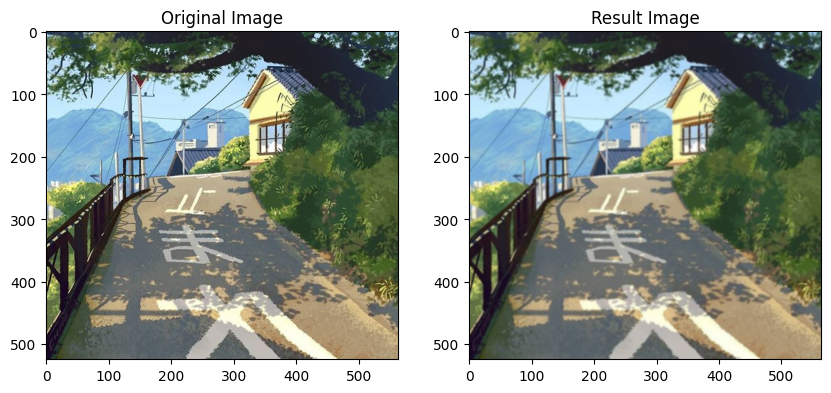

In [7]:
img = cv2.imread('home2.jpg')

# kernel size and standard deviation
blur_img = cv2.GaussianBlur(img, (5,5), 0)

# result function
def show_result(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].imshow(img1[:,:,::-1]) # reversing the color channels
    ax[0].set_title('Original Image')
    ax[1].imshow(img2[:,:,::-1])
    ax[1].set_title('Result Image');
    
show_result(img, blur_img)

## Pyramid Down Operator for Reducing the image size

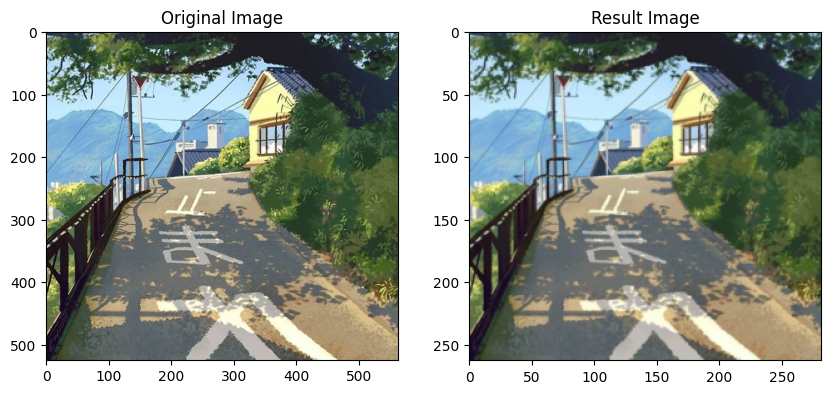

In [8]:
img = cv2.imread('home2.jpg')
smaller_img = cv2.pyrDown(img)

show_result(img, smaller_img)

## Canny Edge Detection [writes its output to a single channel (grayscale) image]

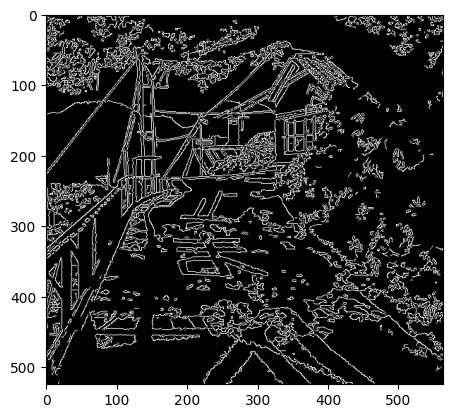

In [10]:
img = cv2.imread('home2.jpg', cv2.IMREAD_GRAYSCALE)

# minimum and maximum intensity gradients
canny_img = cv2.Canny(img, 100,200)
canny_img = cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB)

plt.imshow(canny_img);

## Combining the Pyramid Down Operator (twice) and the Canny Subroutine in a Simple Image Pipeline

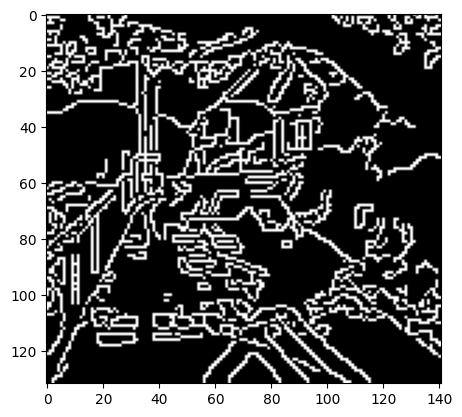

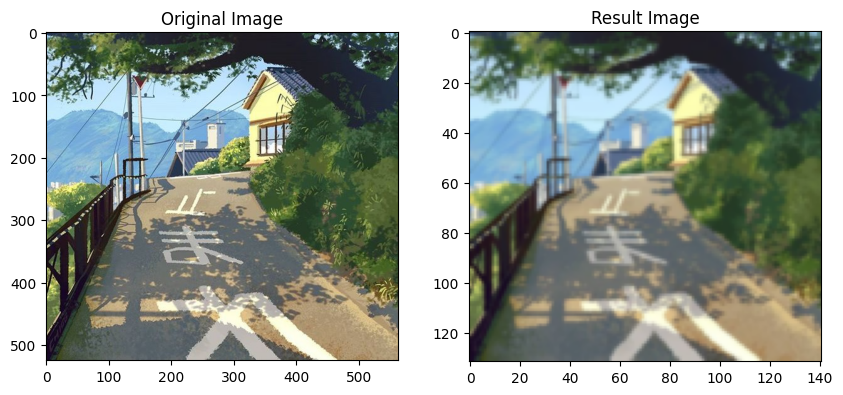

In [11]:
img = cv2.imread('home2.jpg')

# pyramid down operator (twice)
smaller_img = cv2.pyrDown(img)
twice_smaller_img = cv2.pyrDown(smaller_img)

# canny edge detection
canny_img = cv2.Canny(twice_smaller_img, 100, 200)
canny_img = cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB)

plt.imshow(canny_img); 
show_result(img, twice_smaller_img)


## Reading in a Color Video and Writing Out the Same Video in Grayscale

In [2]:
cap = cv2.VideoCapture('Selfie.mp4')

# getting the video dimensions and FPS
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# create a VideoWriter object to write the output video
output_file = "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
gray_video = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height), isColor=False)

# looping through each frame
while cap.isOpened():
    ret, frame = cap.read()
    
    # converting into grayscale
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # output video
    gray_video.write(grayscale)
    
    cv2.imshow("Grayscale Video", grayscale)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the resources
cap.release()
gray_video.release()
cv2.destroyAllWindows()

## Using ImageROI to Increment All of the Pixels in a Region

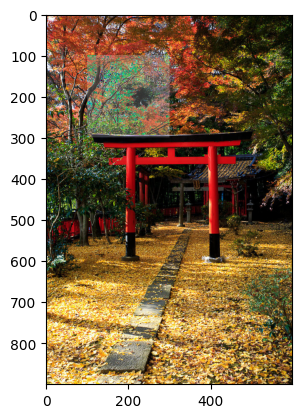

In [12]:
inc_img = cv2.imread('shrine.jpg')

# Defining the region of interest
x, y, w, h = 100, 100, 200, 200

# Extracting ROI
roi = inc_img[y:y+h, x:x+w]

# Incrementing the pixels by 50 
roi += 50

# Copying the roi back to image
inc_img[y:y+h, x:x+w] = roi
inc_img = cv2.cvtColor(inc_img, cv2.COLOR_BGR2RGB)

plt.imshow(inc_img);

## Alpha Blending two ROIs from Different Images

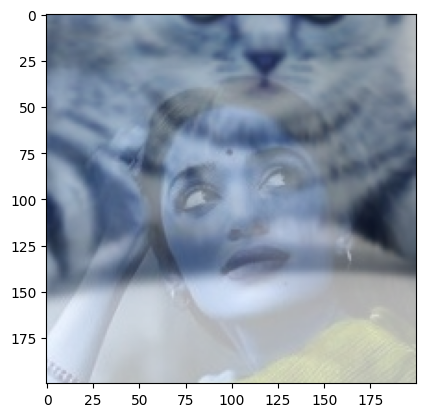

In [38]:
src1 = cv2.imread('woman.jpg')
src2 = cv2.imread('kitty.jpg')
src2 = cv2.pyrDown(src2)


# ROI coordinates
x, y, w, h = 100, 100, 200, 200

# Extracting the ROIs from the source images
roi1 = src1[y:y+h, x:x+w]
roi2 = src2[y:h, x:w]

# Resizing roi2 to match roi1
roi2 = cv2.resize(roi2, (w, h))

# Setting the alpha blending parameters
alpha = 0.3 # blending strength of src1
beta = 1.0 - alpha # blending strength of src2 
gamma = 0.0

# Blending the two ROIs using the cv2.addWeighted() function
result = cv2.addWeighted(roi1, alpha, roi2, beta, gamma)

# Copying the blended ROI back to the original image
src1[y:y+h, x:x+w] = result

plt.imshow(result);

## Toy Program for Using a Mouse to Draw Boxes on the Screen

In [53]:
import cv2

colors = [(0, 0, 255), (128,128,0), (226,43,138), (50,205,154), (0,0,139), (0,100,0), (255,144,30)]
color_index = 0

# Define the callback function for mouse events
def draw_rectangle(event, x, y, flags, params):
    global pt1, pt2, drawing, color_index, colors

    # If left mouse button is pressed, start drawing a rectangle
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        color_index = (color_index + 1) % len(colors)
        pt1 = (x, y)
        pt2 = (x, y)
        
    # If mouse is moving, update the rectangle dimensions
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
            pt2 = (x, y)
            
    # If left mouse button is released, stop drawing the rectangle
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        pt2 = (x, y)
        cv2.rectangle(img, pt1, pt2, colors[color_index], 2)
        cv2.imshow('image', img)

# Create an empty image
img = cv2.imread('whitebg.jpg')

# Create a window and set the mouse callback function to draw_rectangle
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rectangle)

# Start the main loop
drawing = False
while True:
    cv2.imshow('image', img)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources and close the window
cv2.destroyAllWindows()


## Comparing Threshold to Adaptive Threshold

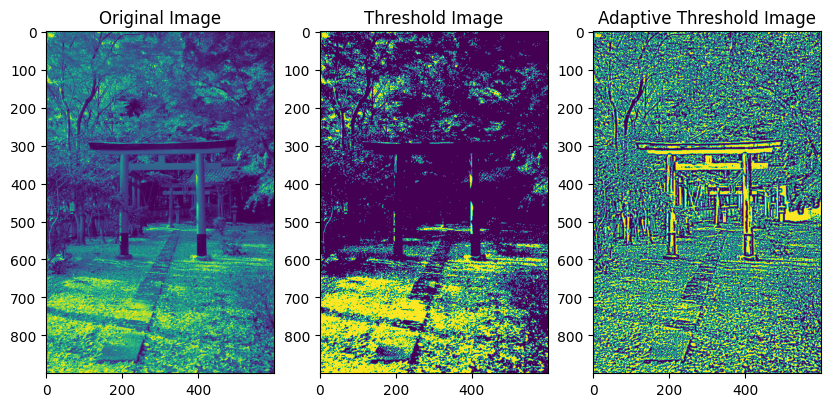

In [85]:
img = cv2.imread('shrine.jpg', cv2.IMREAD_GRAYSCALE)

# Applying a fixed-level threshold to the image
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Applying an adaptive threshold to the image
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# plotting the image
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(img) # reversing the color channels
ax[0].set_title('Original Image')
ax[1].imshow(thresh1)
ax[1].set_title('Threshold Image')
ax[2].imshow(thresh2)
ax[2].set_title('Adaptive Threshold Image');

cv2.imshow('Original', img)
cv2.imshow('Threshold', thresh1)
cv2.imshow('Adaptive Threshold', thresh2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Using Sobel, Canny, Laplacian, and Scharr Filters

In [78]:
import cv2
import numpy as np

# Load the input image in grayscale
img = cv2.imread('shrine.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Canny filter
canny = cv2.Canny(img, 100, 200)

# Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Scharr filter
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)

# Display the output images
cv2.imshow('Sobel Filter', sobel)
cv2.imshow('Canny Filter', canny)
cv2.imshow('Laplacian Filter', laplacian)
cv2.imshow('Scharr Filter', scharr)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Stretching, Shrinking, and Rotating the Image

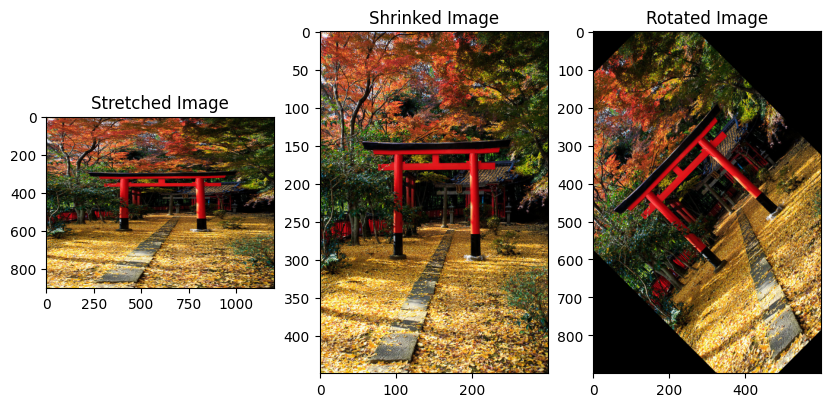

In [86]:
img = cv2.imread('shrine.jpg')

# Getting the dimensions of the image
h, w = img.shape[:2]

# Resizing the image horizontally by a factor of 2 for stretching
new_w = int(w * 2)
new_h = h
stretched_img = cv2.resize(img, (new_w, new_h))

# Resizing the image by a factor of 2 using the INTER_AREA interpolation method for shrinking
new_w = int(w / 2)
new_h = int(h / 2)
shrunken_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

# Calculating the rotation matrix for rotating
M = cv2.getRotationMatrix2D((w/2, h/2), 45, 1)
rotated_img = cv2.warpAffine(img, M, (w, h))

# plotting the image
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(stretched_img[:,:,::-1]) # reversing the color channels
ax[0].set_title('Stretched Image')
ax[1].imshow(shrunken_img[:,:,::-1])
ax[1].set_title('Shrinked Image')
ax[2].imshow(rotated_img[:,:,::-1])
ax[2].set_title('Rotated Image');

# Displaying the output images
cv2.imshow('Stretched Image', stretched_img)
cv2.imshow('Shrinked Image', shrunken_img)
cv2.imshow('Rotated Image', rotated_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Perspective Transformation -  [to correct perspective distortion]

In [90]:
img = cv2.imread('document.jpg')
img = cv2.resize(img, (640, 480))

# Define the source and destination points for the perspective transform
src_pts = np.float32([(141, 131), (480, 159), (493, 630), (64, 601)])
dst_pts = np.float32([(0, 0), (img.shape[1], 0), (img.shape[1], img.shape[0]), (0, img.shape[0])])

# Compute the perspective transform matrix and apply it to the image
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
perspective_img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Display the original and transformed images
cv2.imshow('Input Image', img)
cv2.imshow('Perspective Transform', perspective_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine Transformation - [linear transformation, used to rotate, scale, and shear an image]

In [5]:
img = cv2.imread('shrine.jpg')

# Defining the affine transformation matrix
M = np.float32([[1, 0, 50], [0, 1, 100]])

# Applying the affine transform to the image
affine_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# Displaying the original and transformed images
cv2.imshow('Input Image', img)
cv2.imshow('Affine Transform', affine_img)
cv2.waitKey(0)
cv2.destroyAllWindows()